In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from net import Network, plotlosses
from dense import Dense
from activations import Tanh, Softmax
from losses import mse_loss
from datautils import my_train_test_split, encode_categories

In [2]:
iris_data = pd.read_csv('../../neural-nets/data/iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:


all_species = np.unique(iris_data['species'])
encoded_species = encode_categories(iris_data['species'], all_species)
encoded_species_df = pd.DataFrame(encoded_species, columns=all_species)


iris_df = pd.concat([iris_data, encoded_species_df], axis=1)
iris_df.drop('species', axis=1, inplace=True)


#### Splitting


In [5]:
x_train, y_train, x_test, y_test = my_train_test_split(df=iris_df, y_columns=['setosa', 'versicolor', 'virginica'], random_state=2, test_size=0.25)


In [6]:
x_train.shape

(112, 4, 1)

#### Network creation

In [7]:
iris_network = [
    Dense(4, 2),
    Tanh(),
    Dense(2, 3),
    Softmax(3,3)
]
Net = Network(layers=iris_network, loss=mse_loss, lr=0.011, epochs=500)

In [ ]:
from optimizers import Momentum

opt = Momentum(Net.lr)
Net.opti = opt

#### Training 

In [8]:
train_loss, val_loss = Net.train(train_data=(x_train, y_train), val_data=(x_test, y_test))

1 0.2559903821233485
2 0.24808714996700273
3 0.24290534094179225
4 0.23875019828903568
5 0.235063598181458
6 0.23177121544551724
7 0.2289447236444291
8 0.2266490819028537
9 0.2248847180091162
10 0.22358555056371102
11 0.22264383770566049
12 0.22193592671920023
13 0.22133108701621854
14 0.22066625699946507
15 0.21961795787234278
16 0.21690486741130963
17 0.2017250257739089
18 0.1750247120428694
19 0.16086444960741142
20 0.15074540023020266
21 0.14343295826117672
22 0.13806984476503495
23 0.1340366116212892
24 0.13092093268147825
25 0.12845179374707053
26 0.1264492810208452
27 0.12479179023439965
28 0.12339538119375874
29 0.12220081659765546
30 0.1211653528721971
31 0.12025747064208588
32 0.11945343948720687
33 0.11873504094481471
34 0.11808803269885983
35 0.11750109388198691
36 0.1169650874096609
37 0.11647253455424703
38 0.11601723396811138
39 0.115593980707663
40 0.11519835570594651
41 0.11482656576481322
42 0.11447532043859152
43 0.11414173636536364
44 0.11382326241959019
45 0.113517

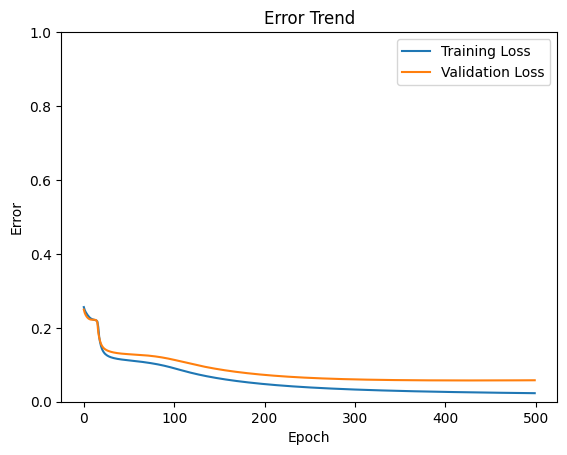

In [9]:
plotlosses(train_loss, val_loss)